<p>
    <a href="https://opencv.org/" >
        <img src="https://opencv.org/wp-content/uploads/2022/05/logo.png">
    </a>
</p>

# Image processing with openCV

In [ ]:
!pip install opencv-python-headless

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Load an image from file
cwd = os.getcwd()
image_path = os.path.join(cwd, 'src', 'lenna.png')
image = cv2.imread(image_path)

# Convert the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)


In [ ]:
!curl -O https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp goldhill.bmp
!curl -O https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg cameraman.jpeg
!curl -O https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/zelda.png zelda.png
!curl -O https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png mammogram.png

### Histogram means plottting the occurance of intensity value in each pixels

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()


toy_image is intensity value in the range from 0 to 2.<br>
<p>
    <code>cv2.calcHist cv2.calcHist(images, channels, mask, histSize, ranges)</code>   
</p>
<ul> 
    <li>channels means color channel to compute for histogram </li>
    <li>mask is region of interest</li>
    <li>hist size is number of bins, for 8-bit image -> usually 256</li>
</ul>

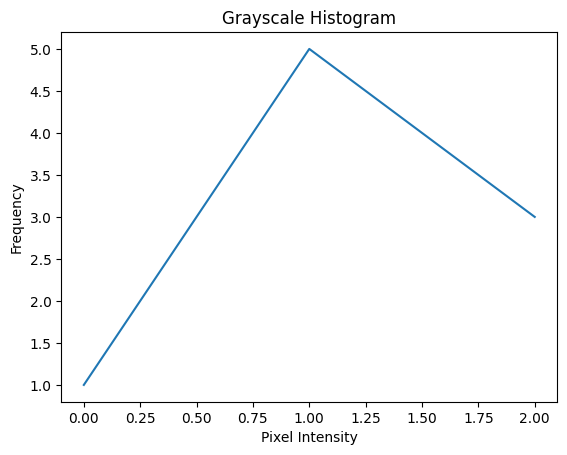

In [15]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
hist = cv2.calcHist(
    images=[toy_image],
    channels=[0],
    mask=None,
    histSize=[3],
    ranges=[0, 3]
)

plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

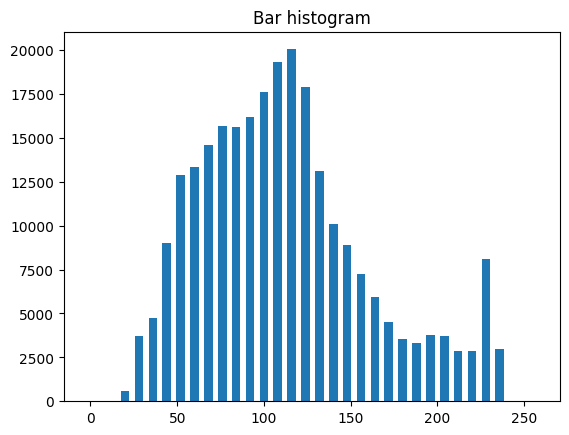

In [16]:
goldhill = cv2.imread("./src/goldhill.bmp", cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([goldhill],[0], None, [256], [0,256])
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

### Brightness and contrast adjustments

Thinks image as function f(x,y), x is row and y is column.<br>
We can use multiplication by $\alpha$ for contrast control and addition by $\beta$ to improve brightness control. 
This applies the Intensity Transformation as well.<br> The image is $f(x,y)$ and the transformed image is $g(x,y)$, 
where $g(x,y) = \alpha f(x,y) + \beta$.

- multiplication by $\alpha$ affects contrast.
- Increasing contrast enlarges the difference between dark and bright pixels.
- addition of $\beta$ affects brightness.
- Brightness adjustment shifts all pixel values uniformly.

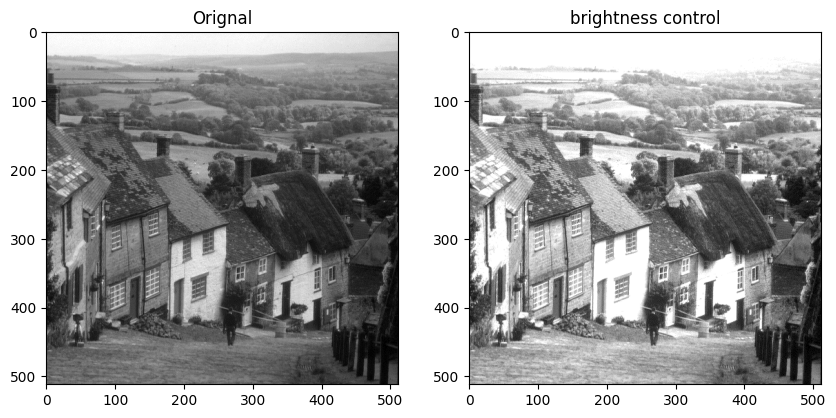

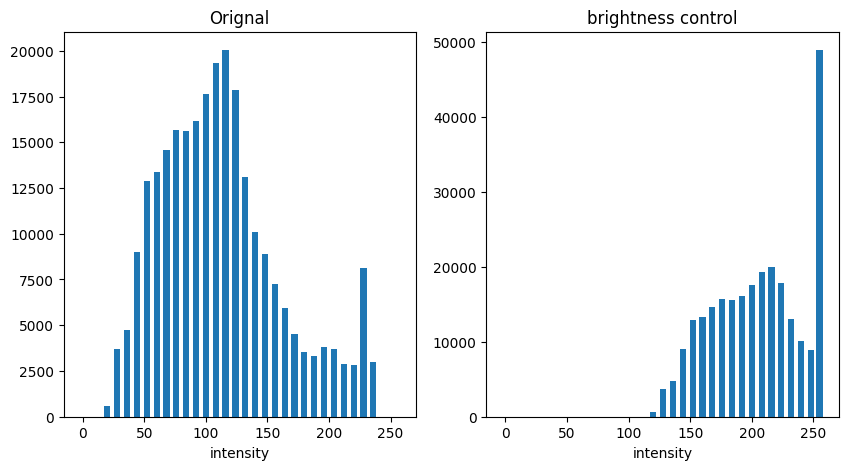

In [9]:
import cv2
import matplotlib.pyplot as plt

goldhill = cv2.imread("./src/goldhill.bmp", cv2.IMREAD_GRAYSCALE)
alpha = 1 # Simple contrast control
beta = 100   # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

plot_image(goldhill, new_image, title_1 = "Orignal", title_2 = "brightness control")
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness control")

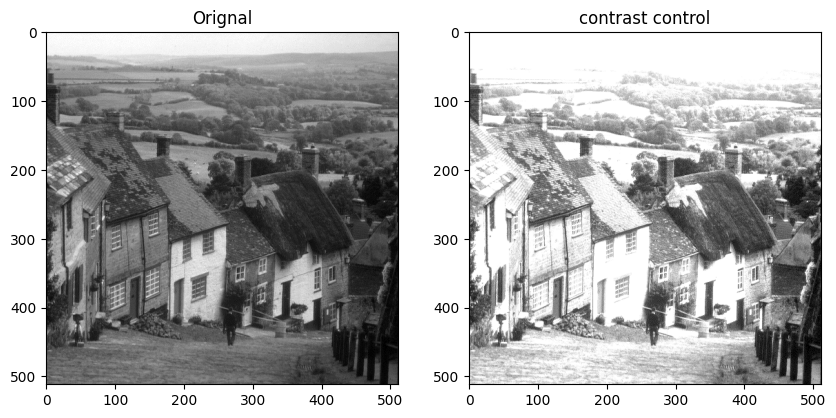

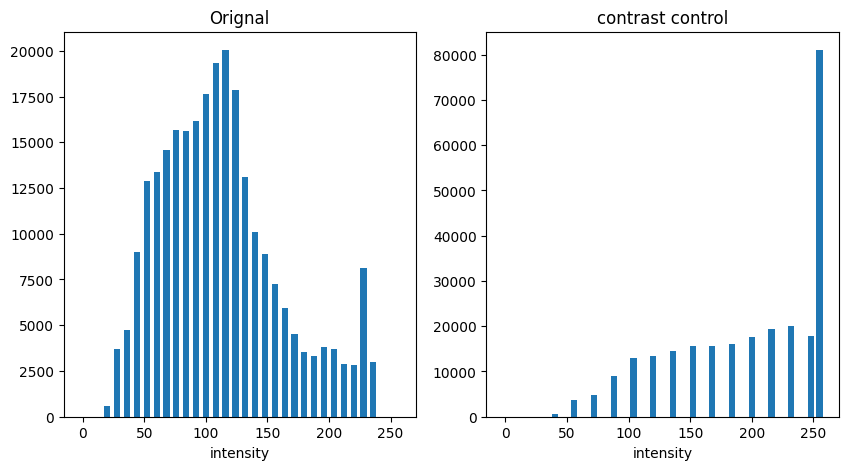

In [10]:
import cv2
import matplotlib.pyplot as plt

goldhill = cv2.imread("./src/goldhill.bmp", cv2.IMREAD_GRAYSCALE)
alpha = 2 # Simple contrast control
beta = 0   # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

plot_image(goldhill, new_image, title_1 = "Orignal", title_2 = "contrast control")
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "contrast control")

### Segmentation means dividing an image into meaningful regions (objects vs background).
### Thresholding is the simplest segmentation technique.

In [11]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
        
    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out                             

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("./src/cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

plot_image(image, new_image, "Orignal", "Image After Thresholding")
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("./src/cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
threshold = 87
max_value = 255
min_value = 0
ret, new_image = cv2.threshold(image, threshold, max_value, cv2.THRESH_BINARY)

plot_image(image, new_image, "Orignal", "Image After Thresholding")
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")
